# Project 2

This project is taken from section 3.1 in the textbook [1].

Suppose you are asked to design the first ascent and drop for a new 
roller coaster. 
By studying photographs of your favorite coasters, you decide to make the slope of the ascent 0.8 and the slope of the drop $−1.6$. You decide to connect these two straight stretches $y = L_{1}(x)$ and $y = L_{2}(x)$ with part of a parabola $y = f(x) = ax^2+bx+c$, where $x$ and $f(x)$ are measured in feet. For the track to be smooth there can’t be abrupt changes in direction, so you want the linear segments $L_1$ and $L_2$ to be tangent to the parabola at the transition points $P$ and $Q$. (See the figure.) 
To simplify the equations, you decide to place the origin at $P$.


<table><tr><td><img src='f65.png'></td><td><img src='f66.png'></td></tr></table>"

* Suppose the horizontal distance between $P$ and $Q$ is 100 ft. Write  equations in $a, b,$ and $c$ that will ensure that the track is smooth  at the transition points.

* Solve the equations in part (a) for $a,b,$ and $c$ to find a formula for $f(x)$.
* Plot $L_{1}$,$f$, and $L_2$ to verify graphically that the transitions are smooth.
* Find the difference in elevation between $P$ and $Q$.

# Solution

Let us first differentiate the function $f(x)=ax^2+bx+c$. 

In [86]:
import sympy as sp
from math import *
from sympy import *
x, a, b, c, C = symbols('x a b c C')
f = a*x**2 + b*x + c
f

a*x**2 + b*x + c

In [87]:
f_prime = f.diff(x)
f_prime

2*a*x + b


Let us consider a point $(0, 0)$ to be a arbitrary point in the parabola when the slope of the ascent is 0.8 ( we can consider any point to be our starting point in 2-D space). So the drop of $-1.6$ will be at $x = 100$. 

We have $f(x) = ax^2+bx+c$.

* Then,
$f(0) = c = 0$.

* Therefore, we know $f'(x) = 2ax+b$ and $f'(0) = b = 0.8$ ( Note: Slope of the tangent(ascent) line should be same as the slope of the rollar coaster track(parabola) for smoothness).

* Similarly, $f'(100) = (200a + b) = (200a + 0.8) = -1.6$. 

* Hence, $a = -0.012$ and $f(x) = -0.012x^2+0.8x$.

* We now have to accurately define our slope function:
For ascent of 0.8, we considered $(0,0)$ to be an arbitrary defining point. 

* This will give $y = L_1(x) = 0.8x+ C$ and $C = 0$.
On the other hand, for drop point $x = 100 $
so $y = -0.012x^2+0.8x = -0.012\cdot100^2+0.8\cdot100 = -40$. 

* This will give $y = L_2(x) = -1.6x+ K$ and $K = 120$.

* Finally, we have the defining function of the rollar coaster to be $f(x) = -0.012x^2+0.8x$ and the ascent and drop stretches be $y = L_1(x) = 0.8x$ and $y = L_2(x) = -1.6x+ 120$ respectively.   

We next input $L_1(x) = 0.8 x$ and $L_2(x) = -1.6x + C$.

In [88]:
L_1 = 0.8*x
L_1

0.8*x

In [89]:
L_2 = -1.6*x+C
L_2

C - 1.6*x

We will determine the coefficients $a, b, c$, and $C$. To proceed, we compute $f(0), f'(0), f(100)$ and $f'(100)$.

In [90]:
# f(0)
f1 = f.subs(x,0)
f1

c

In [91]:
# f'(0)
f2 = f.diff(x).subs(x,0)
f2

b

In [92]:
# f(100)
# YOUR CODE HERE
f3 = f.subs(x,100)
f3

10000*a + 100*b + c

In [93]:
# f'(100)
# YOUR CODE HERE
f4 = f.diff(x).subs(x,100)
f4

200*a + b

Solve the following system of equations
$$
\begin{cases}
f(0) = L_1(0) = 0\\
f'(0) = L_1'(0) = 0.8 \\
f'(100) = L_2'(100) = -1.6 \\
f(100) = L_2(100) 
\end{cases}
$$


In [99]:
sol1 = solve((f1 - L_1.subs(x,0),
            f2 - L_1.diff(x).subs(x,0),
            f3 - L_2.subs(x,100),
            f4 - L_2.diff(x).subs(x,100)),
           a, b, c, C)
sol1

{a: -0.0120000000000000, b: 0.800000000000000, c: 0.0, C: 120.000000000000}

In [100]:
sol1[a]

-0.0120000000000000

In [101]:
sol1[b]

0.800000000000000

In [102]:
sol1[c]

0.0

In [103]:
sol1[C]

120.000000000000

Now we get ready to construct our roller coaster. 

In [104]:
def RC1(x):
    if x<0:
        #YOUR CODE HERE
        return 0.8*x
    elif 0<= x <100:
        return sol1[a]*x**2 + sol1[b]*x 
    else:
        return 120-1.6*x

Graph the roller coaster function in the next cell.

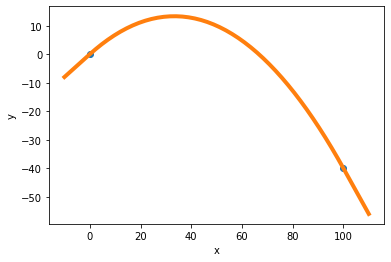

In [152]:
x = np.linspace(-10, 110, endpoint = True)
VRC1 = np.vectorize(RC1)

plt.plot((0,100), (0, -40), 'o')
plt.plot(x, VRC1(x), linewidth=4)
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim(-80, 40)
plt.show()

* The difference in elevation between P and Q ia $0 - (-40) = 40$ ft.

The solution in Problem 1 might $look$ $smooth$, but it might not *feel* smooth because the piecewise defined function consisting of $L_{1}(x)$ for $x < 0,\; f(x)$ for $0 ≤ x ≤ 100$, and $L_2(x)$ for $x > 100$ doesn’t have a continuous second derivative. So you decide to improve the design by using a quadratic function $q(x) = ax^2+bx+c$ only on the interval $10 ≤ x ≤ 90$ and connecting it to the linear functions by means of two cubic functions:

$$
\begin{cases}
g(x) = kx^3+lx^2+mx+n,\;\; \mbox{for}\;\; 0 \le x < 1 0 \\[1ex]
h(x) = px^3+qx^2+rx+s, \;\; \mbox{for}\;\; 90 < x ≤ 100
\end{cases}
$$

* Write a system of equations in 11 unknowns that ensure that the functions and their first two derivatives agree at the transition points.
* Solve the equations in part (a) with a computer algebra system to find formulas for q(x), g(x), and h(x).
* Plot $L_{1}$, g, q, h, and $L_{2}$, and compare with the plot in Problem 1(c).

In [127]:
def df(f):
    return diff(f,x)

def ddf(f):
    return diff(f,x,2)

In [128]:
from pandas import DataFrame
x, k, l, m, n, a, b, c, p, q, r, s = symbols('x k l m n a b c p q r s')

#Input the functions L1(x), g(x), q(x), h(x), and L2(x)
L1 = 0.8*x
g = k*x**3 + l*x**2 + m*x + n
Q = a*x**2 + b*x + c
h = p*x**3 + q*x**2 + r*x + s
L2 = -1.6*x + 120

In [129]:
L1

0.8*x

In [130]:
g

k*x**3 + l*x**2 + m*x + n

In [131]:
Q

a*x**2 + b*x + c

In [132]:
h

p*x**3 + q*x**2 + r*x + s

In [133]:
L2

120 - 1.6*x

For convenience, we can make a table of values in the next cell. 

In [134]:
from IPython.display import display, Math, Latex
import pandas as pd

table = {'$Interval$': ['$(-\infty, 0)$', '$[0, 10)$', '$[10, 90)$', '$(90, 100]$', '$(100, \infty)$'], 
         '$Function$': ['${}$'.format(latex(L1)), '${}$'.format(latex(g)), '${}$'.format(latex(Q)), 
                      '${}$'.format(latex(h)), '${}$'.format(latex(L2))],
         '$First\;Derivative$': ['${}$'.format(latex(df(L1))), '${}$'.format(latex(df(g))), 
                                 '${}$'.format(latex(df(Q))), '${}$'.format(latex(df(h))), 
                                 '${}$'.format(latex(df(L2)))],
         '$Second\; Derivative$': ['${}$'.format(latex(ddf(L1))), '${}$'.format(latex(ddf(g))), 
                                   '${}$'.format(latex(ddf(Q))), '${}$'.format(latex(ddf(h))), 
                                   '${}$'.format(latex(ddf(L2)))]}
DataFrame(table)

,$Interval$,$Function$,$First\;Derivative$,$Second\; Derivative$
0,"$(-\infty, 0)$",$0.8 x$,$0.8$,$0$
1,"$[0, 10)$",$k x^{3} + l x^{2} + m x + n$,$3 k x^{2} + 2 l x + m$,$2 \left(3 k x + l\right)$
2,"$[10, 90)$",$a x^{2} + b x + c$,$2 a x + b$,$2 a$
3,"$(90, 100]$",$p x^{3} + q x^{2} + r x + s$,$3 p x^{2} + 2 q x + r$,$2 \left(3 p x + q\right)$
4,"$(100, \infty)$",$120 - 1.6 x$,$-1.6$,$0$


<table><tr><td><img src='2.png'></td></tr></table>

We can solve this system of equations in the next cell.

In [135]:
# YOUR CODE HERE
e1 = g.subs(x,0)-L1.subs(x,0)
e2 = df(g).subs(x,0)-df(L1).subs(x,0)
e3 = ddf(g).subs(x,0)-ddf(L1).subs(x,0)

e4 = g.subs(x,10)-Q.subs(x,10)
e5 = df(g).subs(x,10)-df(Q).subs(x,10)
e6 = ddf(g).subs(x,10)-ddf(Q).subs(x,10)

e7 = h.subs(x,90)-Q.subs(x,90)
e8 = df(h).subs(x,90)-df(Q).subs(x,90)
e9 = ddf(h).subs(x,90)-ddf(Q).subs(x,90)

e10 = h.subs(x,100)-L2.subs(x,100)
e11 = df(h).subs(x,100)-df(L2).subs(x,100)
e12 = ddf(h).subs(x,100)-ddf(L2).subs(x,100)


In [136]:
sol2 = solve((e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12),
           a,b,c,k,l,m,n,p,q,r,s)
sol2

{s: -324.444444444444,
 r: 11.7333333333333,
 q: -0.133333333333333,
 p: 0.000444444444444444,
 a: -0.0133333333333333,
 b: 0.933333333333333,
 c: -0.444444444444444,
 k: -0.000444444444444444,
 l: 0.0,
 m: 0.800000000000000,
 n: 0.0}

<table><tr><td><img src='3.png'></td></tr></table>

Alternative way:: We can solve the above systme of equations in the maxtrix form: $Ax=b$.

In [118]:
import sympy 
from sympy import *

# YOUR CODE HERE
A = Matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.8],
            [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
            [-100, -10, -1, 1000, 100, 10, 1, 0, 0, 0, 0, 0],
            [-20, -1, 0, 300, 20, 1, 0, 0, 0, 0, 0, 0],
            [-2, 0, 0, 60, 2, 0, 0, 0, 0, 0, 0, 0],
            [-8100, -90, -1, 0, 0, 0, 0, 729000, 8100, 90, 1, 0],
            [-180, -1, 0, 0, 0, 0, 0, 24300, 180, 1, 0, 0],
            [-2, 0, 0, 0, 0, 0, 0, 540, 2, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1000000, 10000, 100, 1, -40],
            [0, 0, 0, 0, 0, 0, 0, 30000, 200, 1, 0, -1.6]]) 
A

Matrix([
[    0,   0,  0,    0,   0,  0, 1,       0,     0,   0, 0,    0],
[    0,   0,  0,    0,   0,  1, 0,       0,     0,   0, 0,  0.8],
[    0,   0,  0,    0,   2,  0, 0,       0,     0,   0, 0,    0],
[ -100, -10, -1, 1000, 100, 10, 1,       0,     0,   0, 0,    0],
[  -20,  -1,  0,  300,  20,  1, 0,       0,     0,   0, 0,    0],
[   -2,   0,  0,   60,   2,  0, 0,       0,     0,   0, 0,    0],
[-8100, -90, -1,    0,   0,  0, 0,  729000,  8100,  90, 1,    0],
[ -180,  -1,  0,    0,   0,  0, 0,   24300,   180,   1, 0,    0],
[   -2,   0,  0,    0,   0,  0, 0,     540,     2,   0, 0,    0],
[    0,   0,  0,    0,   0,  0, 0, 1000000, 10000, 100, 1,  -40],
[    0,   0,  0,    0,   0,  0, 0,   30000,   200,   1, 0, -1.6]])

By reducing A to an RREF (reduced row Echelon Form), we can find the solution of the system. 

In [119]:
A.rref()

(Matrix([
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   -0.0133333333333333],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,     0.933333333333333],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,    -0.444444444444444],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -0.000444444444444444],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,                     0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,                   0.8],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,                     0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,   0.00044444444444445],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,    -0.133333333333335],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,      11.7333333333335],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,     -324.444444444448]]),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

<table><tr><td><img src='4.png'></td></tr></table>

We get ready to improve our roller coaster.

In [137]:
def RC2(x):
    if x<0:
        return sol2[m]*x
    elif 0<= x <10:
        return sol2[k]*x**3 + sol2[l]*x**2 + sol2[m]*x + sol2[n]
    elif 10<= x <90:
        return sol2[a]*x**2 + sol2[b]*x + sol2[c]
    elif 90<= x <100:
        return sol2[p]*x**3 + sol2[q]*x**2 + sol2[r]*x + sol2[s]
    else:
        return 120-1.6*x
        

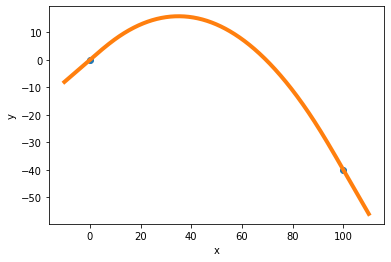

In [151]:
x = np.linspace(-10, 110, 1000, endpoint = True)
VRC2 = np.vectorize(RC2)

plt.plot((0,100), (0, -40), 'o')
plt.plot(x, VRC2(x), linewidth = 4)
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim(-80, 40)
plt.show()

We can either solve the system by using linalg.solve from numpy.

In [153]:
A = np.array([[-20, -1, 0, 300, 20, 1, 0, 0, 0, 0, 0],
              [-100, -10, -1, 1000, 100, 10, 1, 0, 0, 0, 0],
              [-8100, -90, -1, 0, 0, 0, 0, 729000, 8100, 90, 1],
              [-2, 0, 0, 60, 2, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [-180, -1, 0, 0, 0, 0, 0, 24300, 180, 1, 0],
              [-2, 0, 0, 0, 0, 0, 0, 540, 2, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 30000, 200, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1000000, 10000, 100, 1]
             ])
b = np.array([0, 0, 0, 0, 0, 0.8, 0, 0, 0, -1.6, -40])
x = np.linalg.solve(A,b)
x


array([-1.33333333e-02,  9.33333333e-01, -4.44444444e-01, -4.44444444e-04,
       -8.98047069e-17,  8.00000000e-01,  0.00000000e+00,  4.44444444e-04,
       -1.33333333e-01,  1.17333333e+01, -3.24444444e+02])